In [6]:
import nibabel as nib

In [7]:
import numpy as np
import glob
import pandas as pd

In [8]:
import matplotlib.pyplot as plt


In [9]:
test_set_list = glob.glob('cropforeground_test_set/*')

In [10]:
test_set_list = [x for x in test_set_list if ('mask' not in x)]

In [11]:
test_set_list

['cropforeground_test_set\\sub-r001s017_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz',
 'cropforeground_test_set\\sub-r001s025_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz',
 'cropforeground_test_set\\sub-r001s027_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz',
 'cropforeground_test_set\\sub-r004s007_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz',
 'cropforeground_test_set\\sub-r009s008_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz',
 'cropforeground_test_set\\sub-r009s029_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz',
 'cropforeground_test_set\\sub-r024s008_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz',
 'cropforeground_test_set\\sub-r031s019_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz',
 'cropforeground_test_set\\sub-r046s012_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz',
 'cropforeground_test_set\\sub-r052s016_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz']

# 1. module화 전 테스트

In [12]:
img = nib.load(test_set_list[2])
img.shape

(197, 233, 189)

In [13]:
img_array = img.get_fdata()

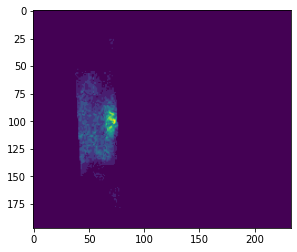

In [14]:
plt.imshow(img_array[:,:,187])

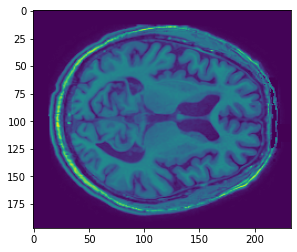

In [66]:
plt.imshow(img_array[:,:,80])

In [16]:
#note: z축 최상단측에 다음과 같은 노이즈 있으나 무시할만함

In [17]:
img_array[:,:,187]

array([[1.17791295, 1.17791295, 1.17791295, ..., 1.17791295, 1.17791295,
        1.17791295],
       [1.17791295, 1.17791295, 1.17791295, ..., 1.17791295, 1.17791295,
        1.17791295],
       [1.17791295, 1.17791295, 1.17791295, ..., 1.17791295, 1.17791295,
        1.17791295],
       ...,
       [1.17791295, 1.17791295, 1.17791295, ..., 1.17791295, 1.17791295,
        1.17791295],
       [1.17791295, 1.17791295, 1.17791295, ..., 1.17791295, 1.17791295,
        1.17791295],
       [1.17791295, 1.17791295, 1.17791295, ..., 1.17791295, 1.17791295,
        1.17791295]])

In [18]:
img_array_z90 = img_array[:,:,90]

In [19]:
img_array_z90

array([[1.17791295, 1.17791295, 1.17791295, ..., 1.17791295, 1.17791295,
        1.17791295],
       [1.17791295, 1.17791295, 1.17791295, ..., 1.17791295, 1.17791295,
        1.17791295],
       [1.17791295, 1.17791295, 1.17791295, ..., 1.17791295, 1.17791295,
        1.17791295],
       ...,
       [1.17791295, 1.17791295, 1.17791295, ..., 1.17791295, 1.17791295,
        1.17791295],
       [1.17791295, 1.17791295, 1.17791295, ..., 1.17791295, 1.17791295,
        1.17791295],
       [1.17791295, 1.17791295, 1.17791295, ..., 1.17791295, 1.17791295,
        1.17791295]])

In [20]:
non_zeros = np.nonzero(img_array_z90>2)

In [21]:
non_zeros

(array([  6,   7,   7, ..., 187, 187, 187], dtype=int64),
 array([144, 144, 146, ...,  90,  91,  92], dtype=int64))

In [22]:
non_zeros[1]

array([144, 144, 146, ...,  90,  91,  92], dtype=int64)

# 2. 배경값이 1.17정도의 값이라서 np.nonzeros에서 안잡혔던거라 06노트북 참고해도 되므로 다시 05번 노트북 참고

In [23]:
xmin_list, xmax_list, ymin_list, ymax_list, zmin_list, zmax_list = [],[],[],[],[],[]


for i in range(len(test_set_list)):
    raw_nii = nib.load(test_set_list[i])
    raw_nii_array = raw_nii.get_fdata()
    non_zeros = np.nonzero(raw_nii_array>3)

    x_min = non_zeros[0].min()
    x_max = non_zeros[0].max()

    y_min = non_zeros[1].min()
    y_max = non_zeros[1].max()

    z_min = non_zeros[2].min()
    z_max = non_zeros[2].max()
    
    xmin_list.append(x_min)
    xmax_list.append(x_max)
    
    ymin_list.append(y_min)
    ymax_list.append(y_max)
    
    zmin_list.append(z_min)
    zmax_list.append(z_max)

In [24]:
xmin_list

[5, 8, 5, 8, 3, 4, 0, 0, 12, 2]

In [25]:
xmax_list

[189, 187, 188, 186, 196, 194, 196, 196, 184, 193]

In [26]:
ymin_list

[4, 6, 0, 9, 0, 2, 0, 2, 0, 9]

In [59]:
def if_minus_return_0(value):
    
    if np.sign(value) == -1:
        value = 0
    else:
        value
        
    return value

def makenonzero3darray(nifti_file_path: str, save_path: str, margin: int) -> None:
    
    file_name = nifti_file_path.split('\\')[-1].rstrip('nii.gz')
    
    nii = nib.load(nifti_file_path)
    nii_array = nii.get_fdata()
    affine = nii.affine
    print(nii.shape)
    
    non_zeros = np.nonzero(raw_nii_array>3)

    x_min = non_zeros[0].min()
    x_max = non_zeros[0].max()

    y_min = non_zeros[1].min()
    y_max = non_zeros[1].max()

    z_min = non_zeros[2].min()
    z_max = non_zeros[2].max()
    
    
    
    clip_x_min = if_minus_return_0(x_min-margin)
    clip_x_max = if_minus_return_0(x_max+margin)
    
    clip_y_min = if_minus_return_0(y_min-margin)
    clip_y_max = if_minus_return_0(y_max-margin)
    
    clip_z_min = if_minus_return_0(z_min-margin)
    clip_z_max = if_minus_return_0(z_max-margin)
    
    
    
    nonzero3darray = nii_array[clip_x_min:clip_x_max, clip_y_min:clip_y_max, clip_z_min:clip_z_max]
    print(nonzero3darray.shape)
    
    img = nib.Nifti1Image(nonzero3darray, affine) 
    img.to_filename(f'{save_path}/nonzero3darray{file_name}.nii.gz')
    
    return nonzero3darray

In [28]:
makenonzero3darray(test_set_list[0], '.', 2)

(197, 233, 189)
(195, 216, 180)


In [29]:
# 3. 루프돌려서 전체 데이터셋 처리하기

[makenonzero3darray(test_set_path, '.', 2) for test_set_path in test_set_list]

(197, 233, 189)
(195, 216, 180)
(197, 233, 189)
(195, 216, 180)
(197, 233, 189)
(195, 216, 180)
(197, 233, 189)
(195, 216, 180)
(197, 233, 189)
(195, 216, 180)
(197, 233, 189)
(195, 216, 180)
(197, 233, 189)
(195, 216, 180)
(197, 233, 189)
(195, 216, 180)
(197, 233, 189)
(195, 216, 180)
(197, 233, 189)
(195, 216, 180)


[None, None, None, None, None, None, None, None, None, None]

# 4. 결과 정성적 확인

In [31]:
img = nib.load('./nonzero3daaray_dataset/nonzero3darraysub-r001s017_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz')
img.shape

(195, 216, 180)

In [32]:
img_array = img.get_fdata()

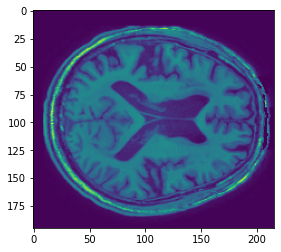

In [33]:
plt.imshow(img_array[:,:,90])

# 5. cropforeground vs nonzero3darray 비교

In [35]:
!pip install monai

In [36]:
import monai

In [37]:
monai.transforms.CropForeground

monai.transforms.croppad.array.CropForeground

In [38]:
test_set_list

['cropforeground_test_set\\sub-r001s017_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz',
 'cropforeground_test_set\\sub-r001s025_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz',
 'cropforeground_test_set\\sub-r001s027_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz',
 'cropforeground_test_set\\sub-r004s007_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz',
 'cropforeground_test_set\\sub-r009s008_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz',
 'cropforeground_test_set\\sub-r009s029_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz',
 'cropforeground_test_set\\sub-r024s008_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz',
 'cropforeground_test_set\\sub-r031s019_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz',
 'cropforeground_test_set\\sub-r046s012_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz',
 'cropforeground_test_set\\sub-r052s016_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz']

In [46]:
def threshold_at_one(x):
    # threshold at 2
    return x > 2

In [47]:
img = nib.load(test_set_list[0])
img_array = img.get_fdata()

In [51]:
img_array.shape

(197, 233, 189)

In [54]:
# monai cropforeground 결과

In [62]:
cropper = monai.transforms.CropForeground(select_fn=threshold_at_one, margin=2)
cropped_img = cropper(img_array)

In [63]:
cropped_img.shape

(197, 230, 178)

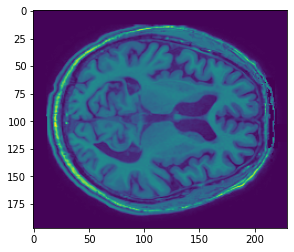

In [64]:
plt.imshow(cropped_img[:,:,80])

In [61]:
nonzero3darray = makenonzero3darray(test_set_list[0], '.', 2)

(197, 233, 189)
(195, 216, 180)


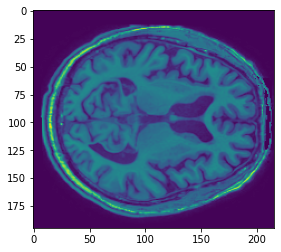

In [65]:
plt.imshow(nonzero3darray[:,:,80])

In [67]:
nonzero3darray

array([[[1.17791295, 1.17791295, 1.17791295, ..., 1.17791295,
         1.17791295, 1.17791295],
        [1.17791295, 1.17791295, 1.17791295, ..., 1.17791295,
         1.17791295, 1.17791295],
        [1.17791295, 1.17791295, 1.17791295, ..., 1.17791295,
         1.17791295, 1.17791295],
        ...,
        [1.17791295, 1.17791295, 1.17791295, ..., 1.17791295,
         1.17791295, 1.17791295],
        [1.17791295, 1.17791295, 1.17791295, ..., 1.17791295,
         1.17791295, 1.17791295],
        [1.17791295, 1.17791295, 1.17791295, ..., 1.17791295,
         1.17791295, 1.17791295]],

       [[1.17791295, 1.17791295, 1.17791295, ..., 1.17791295,
         1.17791295, 1.17791295],
        [1.17791295, 1.17791295, 1.17791295, ..., 1.17791295,
         1.17791295, 1.17791295],
        [1.17791295, 1.17791295, 1.17791295, ..., 1.17791295,
         1.17791295, 1.17791295],
        ...,
        [1.17791295, 1.17791295, 1.17791295, ..., 1.17791295,
         1.17791295, 1.17791295],
        [1.1